In [1]:
using Plots
using Flux
using DiffEqFlux
using OrdinaryDiffEq

 37.688206 seconds (58.16 M allocations: 6.284 GiB, 3.88% gc time, 85.29% compilation time)


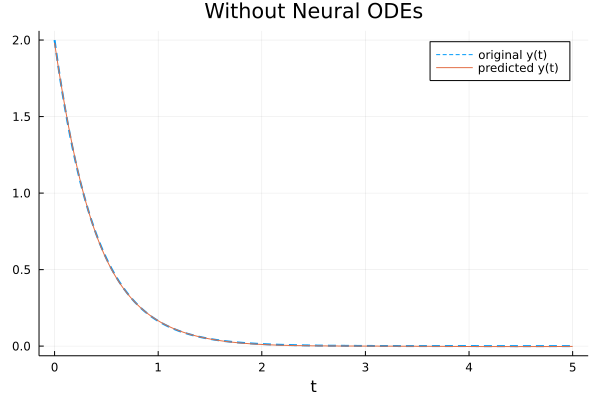

In [5]:
t0 = 0.0
tend = 5.0
N = 200
true_x = range(t0, tend, length=N+1)
true_y = 2*exp.(-true_x./0.4)

function neural_network(data_dim)
    fc = FastChain(FastDense(data_dim, 64, swish),
                  FastDense(64, 32, swish),
                  FastDense(32, data_dim))
end

nn = neural_network(1)
theta = initial_params(nn)

predict(t, p) = nn(t', p)'

loss(p) = begin
  yhat = predict(true_x, p)
  l = Flux.mse(yhat, true_y)
end

learning_rate=1e-2
opt = ADAM()
epochs = 2000

loss_array = []

function cb_train(theta, loss)
    #println("Loss: ", loss)
    append!(loss_array, loss)
    false
end

@time res_train = DiffEqFlux.sciml_train(
    loss, theta, opt,
    maxiters = epochs,
    cb = cb_train)

predicted_y = predict(true_x, res_train.minimizer)

plot(
    true_x,
    true_y,
    linewidth=2, ls=:dash,
    title="Without Neural ODEs",
    xaxis="t",
    label="original y(t)",
    legend=:topright)

plot!(
    true_x,
    predicted_y,
    linewidth=1,
    label="predicted y(t)")